# Ejercicio 6

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Inciso a)

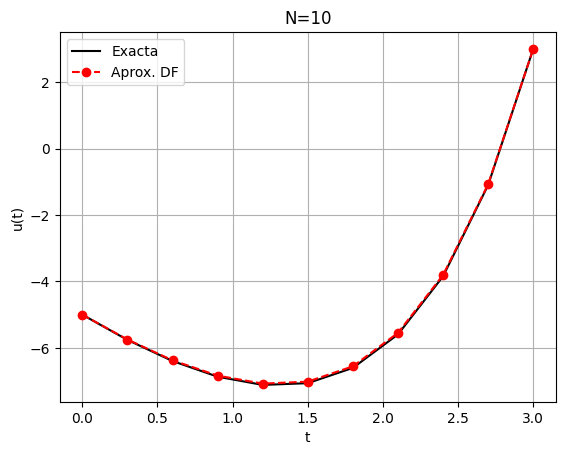

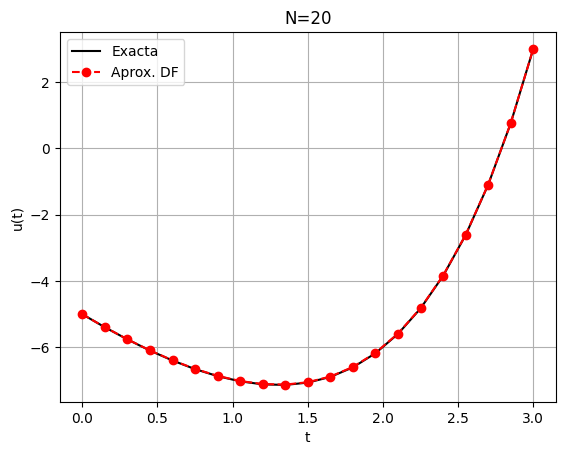

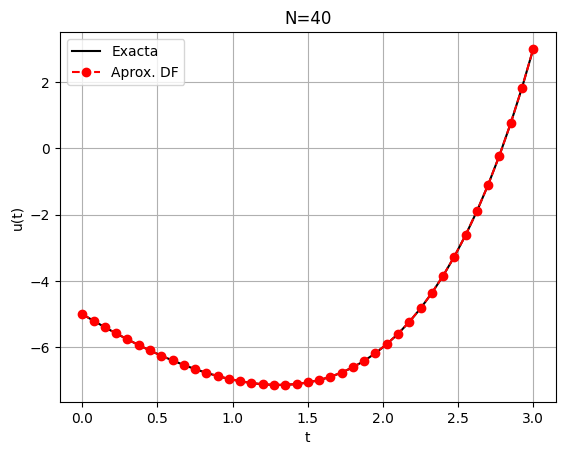

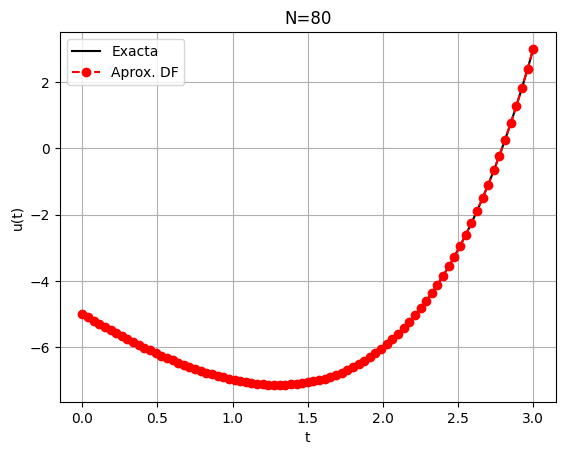

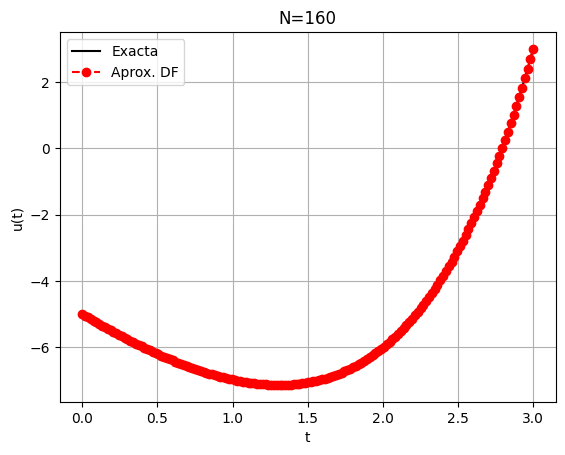

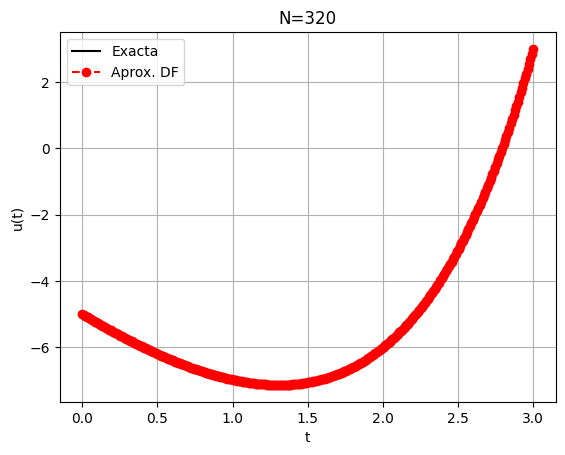

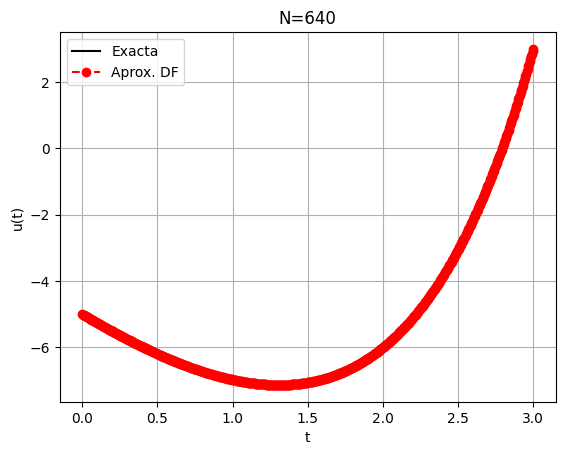

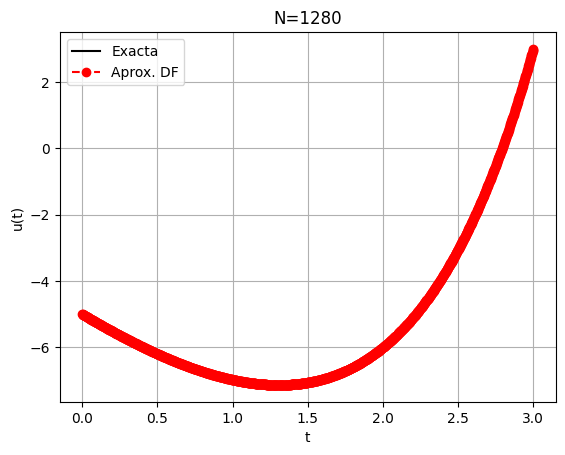

In [6]:
##Implementación 6.a
def finite_diff_solution_6_a(N, a, b):
    h = (b-a) / N
    t = np.linspace(a, b, N + 1)

    n_unknowns = N-1

    A = np.zeros((n_unknowns, n_unknowns))
    f = np.full(n_unknowns, h**2)

    for i in range(n_unknowns):
      f[i] *= np.exp(t[i+1])   # i+1 en vez de i


    f[0] += 5
    f[-1] += -3

    if n_unknowns > 1:
      A[0, 0] = -2
      A[0, 1] = 1

      A[-1, -1] = 1
      A[-1, -2] = -2

    for i in range(1, n_unknowns-1):
        j = i + 1
        A[i, i-1] = 1
        A[i, i]   = -2
        A[i, i+1] = 1
        f[i]      = h**2 * np.exp(t[j])

    # Fila i=n_unknowns-1 => j=N-1
    if n_unknowns > 1:
        A[n_unknowns-1, n_unknowns-2] = 1
        A[n_unknowns-1, n_unknowns-1] = -2
    f[n_unknowns-1] = h**2 * np.exp(t[N-1]) - 3  # restamos U_N=3

    # Resolver
    U_int = np.linalg.solve(A, f)

    # Construir la solución completa, con las fronteras
    u_approx = np.zeros(N+1)
    u_approx[0]  = -5
    u_approx[N]  =  3
    for i in range(n_unknowns):
        j = i + 1
        u_approx[j] = U_int[i]

    return t, u_approx, A


def exact_solution_6(t):
    return ((9 - np.exp(3))/3)*t - 6 + np.exp(t)


# Probar con varios N
N_list = [10,20,40,80,160,320,640,1280]
a,b = 0,3
for N in N_list:
    t, u_approx,_ = finite_diff_solution_6_a(N,a,b)
    u_exact = exact_solution_6(t)

    plt.figure()
    plt.plot(t, u_exact, "k-", label="Exacta")
    plt.plot(t, u_approx, "ro--", label="Aprox. DF")
    plt.title(f"N={N}")
    plt.xlabel("t")
    plt.ylabel("u(t)")
    plt.legend()
    plt.grid(True)
    plt.show()

In [7]:
#Tablas

# Lista de tamaños de paso a probar

N = [10,20,40,80,160,320,640,1280]

hs = [1/(n+1) for n in N]

DOF_list = []
h_list = []
err_inf_list = []
err_2_list = []
err_1_list = []
rate_inf_list = [None]  # El primer valor no tiene tasa
rate_2_list = [None]
rate_1_list = [None]

cond_inf_list = []
cond_2_list = []
cond_1_list = []
rate_cond_inf_list = [None]
rate_cond_2_list = [None]
rate_cond_1_list = [None]

prev_err_inf = prev_err_2 = prev_err_1 = None
prev_cond_inf = prev_cond_2 = prev_cond_1 = None
prev_h = None


for (h,n) in zip(hs,N):
    x, U, A = finite_diff_solution_6_a(n,0,3)
    U_exact = exact_solution_6(x)
    error = np.abs(U - U_exact)
    err_inf = np.linalg.norm(error, np.inf)
    err_2 = np.linalg.norm(error, 2)
    err_1 = np.linalg.norm(error, 1)

    DOF = len(U)
    # Calcular el número de condición de la matriz A en distintas normas
    cond_inf = np.linalg.cond(A, np.inf)
    cond_2 = np.linalg.cond(A, 2)
    cond_1 = np.linalg.cond(A, 1)

    DOF_list.append(DOF)
    h_list.append(h)
    err_inf_list.append(err_inf)
    err_2_list.append(err_2)
    err_1_list.append(err_1)
    cond_inf_list.append(cond_inf)
    cond_2_list.append(cond_2)
    cond_1_list.append(cond_1)

    if prev_h is not None:
        rate_inf = np.log(err_inf / prev_err_inf) / np.log(h / prev_h)
        rate_2 = np.log(err_2 / prev_err_2) / np.log(h / prev_h)
        rate_1 = np.log(err_1 / prev_err_1) / np.log(h / prev_h)
        rate_cond_inf = np.log(cond_inf / prev_cond_inf) / np.log(h / prev_h)
        rate_cond_2 = np.log(cond_2 / prev_cond_2) / np.log(h / prev_h)
        rate_cond_1 = np.log(cond_1 / prev_cond_1) / np.log(h / prev_h)
    else:
        rate_inf = rate_2 = rate_1 = None
        rate_cond_inf = rate_cond_2 = rate_cond_1 = None

    rate_inf_list.append(rate_inf)
    rate_2_list.append(rate_2)
    rate_1_list.append(rate_1)
    rate_cond_inf_list.append(rate_cond_inf)
    rate_cond_2_list.append(rate_cond_2)
    rate_cond_1_list.append(rate_cond_1)

    prev_err_inf, prev_err_2, prev_err_1 = err_inf, err_2, err_1
    prev_cond_inf, prev_cond_2, prev_cond_1 = cond_inf, cond_2, cond_1
    prev_h = h

    err_max = np.max(np.abs(U - U_exact))

    tabla_errores = pd.DataFrame(
        {
            "DOF": DOF_list,
            "h": h_list,
            "||u_h - φ_h||∞": err_inf_list,
            "r∞(u)": rate_inf_list[1:],
            "||u_h - φ_h||₂": err_2_list,
            "r₂(u)": rate_2_list[1:],
            "||u_h - φ_h||₁": err_1_list,
            "r₁(u)": rate_1_list[1:],
        }
    )
    tabla_condicion = pd.DataFrame(
    {
        "DOF": DOF_list,
        "h": h_list,
        "cond∞(A_h)": cond_inf_list,
        "r∞": rate_cond_inf_list[1:],
        "cond₂(A_h)": cond_2_list,
        "r₂": rate_cond_2_list[1:],
        "cond₁(A_h)": cond_1_list,
        "r₁": rate_cond_1_list[1:],
    }
)

In [8]:
tabla_errores

,DOF,h,||u_h - φ_h||∞,r∞(u),||u_h - φ_h||₂,r₂(u),||u_h - φ_h||₁,r₁(u)
0,11,0.090909,0.047797,NaN,0.108790,NaN,0.308606,NaN
1,21,0.047619,0.011990,2.138674,0.038598,1.602490,0.156162,1.053425
2,41,0.024390,0.003003,2.069382,0.013658,1.552753,0.078314,1.031555
3,81,0.012346,0.000751,2.035404,0.004830,1.526721,0.039186,1.016925
4,161,0.006211,0.000188,2.017858,0.001708,1.513444,0.019597,1.008742
5,321,0.003115,0.000047,2.008979,0.000604,1.506742,0.009799,1.004440
6,641,0.001560,0.000012,2.004496,0.000213,1.503376,0.004899,1.002237
7,1281,0.000781,0.000003,2.002253,0.000075,1.501689,0.002450,1.001123


In [9]:
tabla_condicion

,DOF,h,cond∞(A_h),r∞,cond₂(A_h),r₂,cond₁(A_h),r₁
0,11,0.090909,50.0,NaN,39.863458,NaN,50.0,NaN
1,21,0.047619,200.0,-2.143885,161.447639,-2.163102,200.0,-2.143885
2,41,0.024390,800.0,-2.072035,647.789011,-2.076653,800.0,-2.072035
3,81,0.012346,3200.0,-2.036042,2593.155660,-2.037175,3200.0,-2.036042
4,161,0.006211,12800.0,-2.018027,10374.622545,-2.018308,12800.0,-2.018027
5,321,0.003115,51200.0,-2.009015,41500.490155,-2.009085,51200.0,-2.009015
6,641,0.001560,204800.0,-2.004508,166003.960613,-2.004525,204800.0,-2.004508
7,1281,0.000781,819200.0,-2.002254,664017.842448,-2.002258,819200.0,-2.002254


# Inciso b.1)

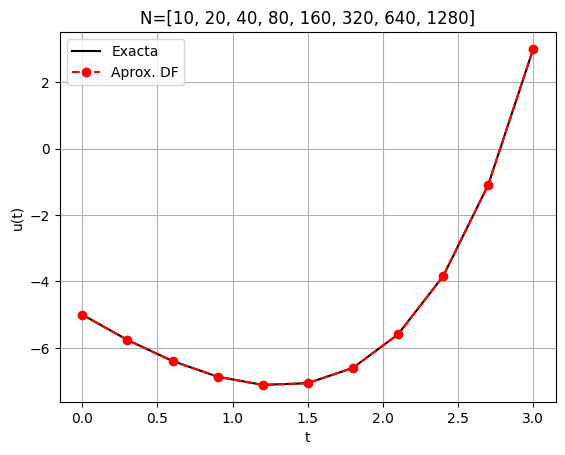

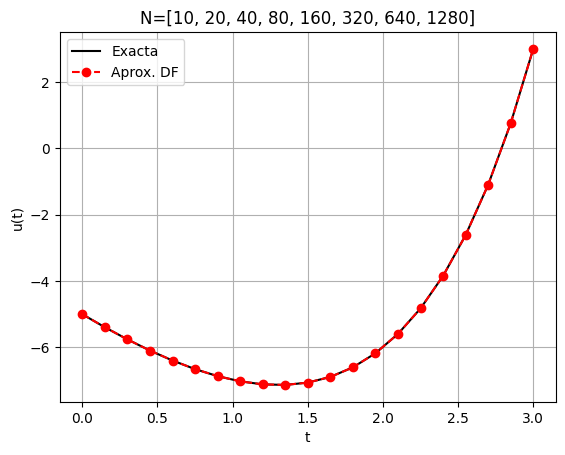

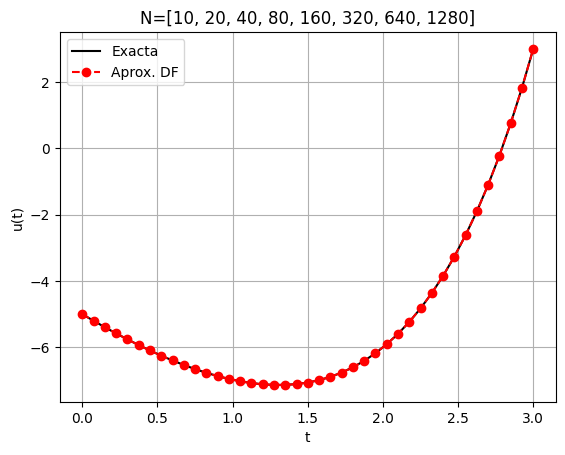

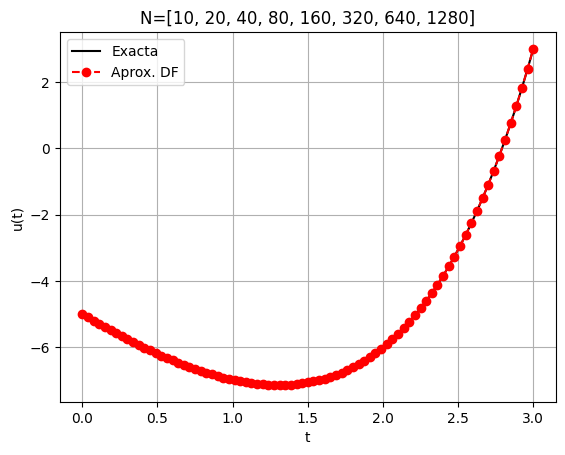

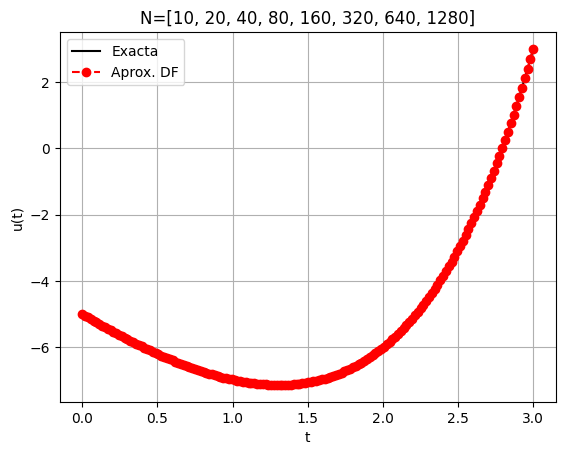

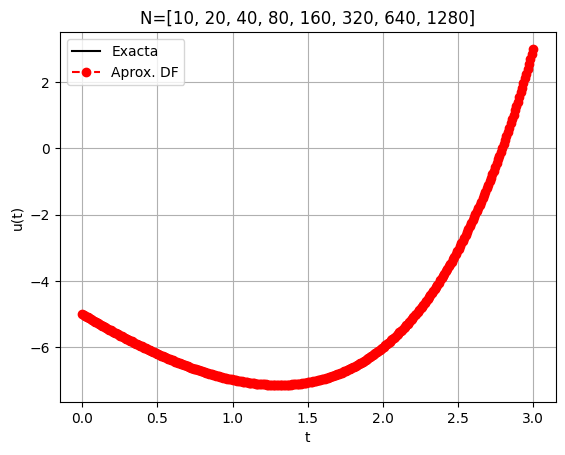

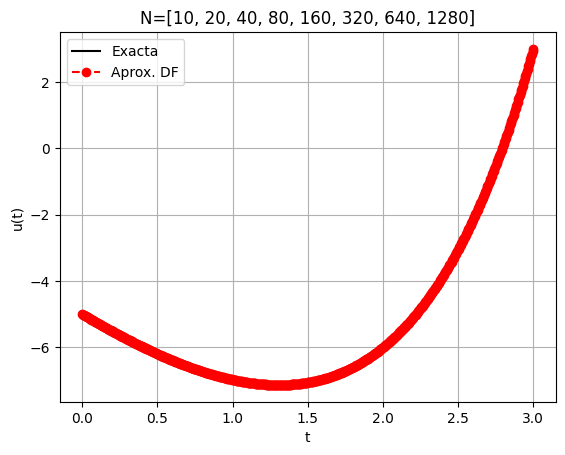

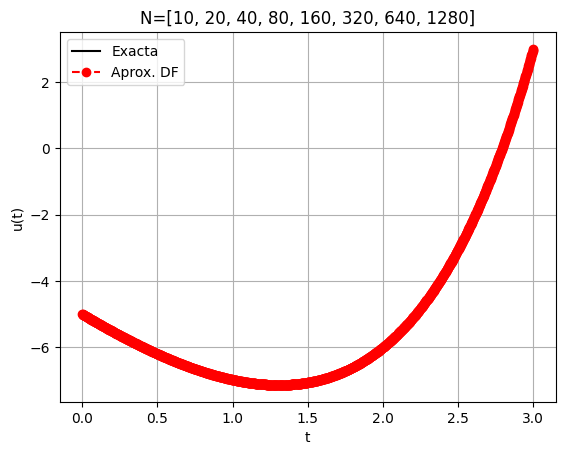

In [12]:
##Implementación 6.b.1
def finite_diff_solution_6_b_1(N, a, b):
    h = (b-a) / N
    t = np.linspace(a, b, N + 1)

    n_unknowns = N - 1
    U = np.zeros(n_unknowns)

    A = np.zeros((n_unknowns, n_unknowns))
    f = np.full(n_unknowns, 12*(h**2))

    for i in range(n_unknowns):
      f[i] *= np.exp(t[i+1])   # i+1 en vez de i


    f[0] += 50
    f[1] += -5
    f[-2] += 3
    f[-1] += -30

    if n_unknowns > 1:
      A[0, 0] = -15
      A[0, 1] = -4
      A[0, 2] = 14
      A[0, 3] = -6
      A[0, 4] = 1

      A[1, 0] = 16
      A[1, 1] = -30
      A[1, 2] = 16
      A[1, 3] = -1

      A[-2, -1] = 16
      A[-2, -2] = -30
      A[-2, -3] = 16
      A[-2, -4] = -1

      A[-1, -1] = -15
      A[-1, -2] = -4
      A[-1, -3] = 14
      A[-1, -4] = -6
      A[-1, -5] = 1

    for i in range(2, n_unknowns - 2):
      A[i, i - 2] = -1
      A[i, i - 1] = 16
      A[i, i] = -30
      A[i, i + 1] = 16
      A[i, i + 2] = -1

    U = np.linalg.solve(A, f)

    u_approx = np.concatenate(([-5.0], U, [3.0]))

    return t, u_approx, A


def exact_solution_6(t):
    return ((9-np.exp(3))/3)*t -6 + np.exp(t)

# Parámetros
N = [10,20,40,80,160,320,640,1280]
for n in N:
  t, u_approx,_ = finite_diff_solution_6_b_1(n,0,3)
  u_exact = exact_solution_6(t)
  plt.figure()
  plt.plot(t, u_exact, "k-", label="Exacta")
  plt.plot(t, u_approx, "ro--", label="Aprox. DF")
  plt.title(f"N={N}")
  plt.xlabel("t")
  plt.ylabel("u(t)")
  plt.legend()
  plt.grid(True)
  plt.show()




In [16]:
#Tablas

# Lista de tamaños de paso a probar

N = [10,20,40,80,160,320,640,1280]

hs = [1/(n+1) for n in N]

DOF_list = []
h_list = []
err_inf_list = []
err_2_list = []
err_1_list = []
rate_inf_list = [None]  # El primer valor no tiene tasa
rate_2_list = [None]
rate_1_list = [None]

cond_inf_list = []
cond_2_list = []
cond_1_list = []
rate_cond_inf_list = [None]
rate_cond_2_list = [None]
rate_cond_1_list = [None]

prev_err_inf = prev_err_2 = prev_err_1 = None
prev_cond_inf = prev_cond_2 = prev_cond_1 = None
prev_h = None


for (h,n) in zip(hs,N):
    x, U, A = finite_diff_solution_6_b_1(n,0,3)
    U_exact = exact_solution_6(x)
    error = np.abs(U - U_exact)
    err_inf = np.linalg.norm(error, np.inf)
    err_2 = np.linalg.norm(error, 2)
    err_1 = np.linalg.norm(error, 1)

    DOF = len(U)
    # Calcular el número de condición de la matriz A en distintas normas
    cond_inf = np.linalg.cond(A, np.inf)
    cond_2 = np.linalg.cond(A, 2)
    cond_1 = np.linalg.cond(A, 1)

    DOF_list.append(DOF)
    h_list.append(h)
    err_inf_list.append(err_inf)
    err_2_list.append(err_2)
    err_1_list.append(err_1)
    cond_inf_list.append(cond_inf)
    cond_2_list.append(cond_2)
    cond_1_list.append(cond_1)

    if prev_h is not None:
        rate_inf = np.log(err_inf / prev_err_inf) / np.log(h / prev_h)
        rate_2 = np.log(err_2 / prev_err_2) / np.log(h / prev_h)
        rate_1 = np.log(err_1 / prev_err_1) / np.log(h / prev_h)
        rate_cond_inf = np.log(cond_inf / prev_cond_inf) / np.log(h / prev_h)
        rate_cond_2 = np.log(cond_2 / prev_cond_2) / np.log(h / prev_h)
        rate_cond_1 = np.log(cond_1 / prev_cond_1) / np.log(h / prev_h)
    else:
        rate_inf = rate_2 = rate_1 = None
        rate_cond_inf = rate_cond_2 = rate_cond_1 = None

    rate_inf_list.append(rate_inf)
    rate_2_list.append(rate_2)
    rate_1_list.append(rate_1)
    rate_cond_inf_list.append(rate_cond_inf)
    rate_cond_2_list.append(rate_cond_2)
    rate_cond_1_list.append(rate_cond_1)

    prev_err_inf, prev_err_2, prev_err_1 = err_inf, err_2, err_1
    prev_cond_inf, prev_cond_2, prev_cond_1 = cond_inf, cond_2, cond_1
    prev_h = h

    err_max = np.max(np.abs(U - U_exact))

    tabla_errores = pd.DataFrame(
        {
            "DOF": DOF_list,
            "h": h_list,
            "||u_h - φ_h||∞": err_inf_list,
            "r∞(u)": rate_inf_list[1:],
            "||u_h - φ_h||₂": err_2_list,
            "r₂(u)": rate_2_list[1:],
            "||u_h - φ_h||₁": err_1_list,
            "r₁(u)": rate_1_list[1:],
        }
    )
    tabla_condicion = pd.DataFrame(
    {
        "DOF": DOF_list,
        "h": h_list,
        "cond∞(A_h)": cond_inf_list,
        "r∞": rate_cond_inf_list[1:],
        "cond₂(A_h)": cond_2_list,
        "r₂": rate_cond_2_list[1:],
        "cond₁(A_h)": cond_1_list,
        "r₁": rate_cond_1_list[1:],
    }
)

In [17]:
tabla_errores

,DOF,h,||u_h - φ_h||∞,r∞(u),||u_h - φ_h||₂,r₂(u),||u_h - φ_h||₁,r₁(u)
0,11,0.090909,4.803037e-04,NaN,5.824676e-04,NaN,1.080094e-03,NaN
1,21,0.047619,2.414743e-05,4.624366,7.351239e-05,3.200948,2.862985e-04,2.053375
2,41,0.024390,2.034875e-06,3.697399,9.125106e-06,3.118490,5.161181e-05,2.560774
3,81,0.012346,1.371470e-07,3.961267,8.788375e-07,3.437015,7.106190e-06,2.912103
4,161,0.006211,8.741364e-09,4.007521,7.942892e-08,3.499118,9.106803e-07,2.990777
5,321,0.003115,5.481402e-10,4.013251,7.045976e-09,3.510546,1.143082e-07,3.007512
6,641,0.001560,3.255440e-11,4.082802,5.798160e-10,3.611254,1.318581e-08,3.122893
7,1281,0.000781,1.090594e-11,1.579516,2.490479e-10,1.220546,7.446104e-09,0.825358


In [18]:
tabla_condicion

,DOF,h,cond∞(A_h),r∞,cond₂(A_h),r₂,cond₁(A_h),r₁
0,11,0.090909,6.666667e+01,NaN,53.255818,NaN,7.937953e+01,NaN
1,21,0.047619,2.666667e+02,-2.143885,215.084588,-2.158778,3.202986e+02,-2.157369
2,41,0.024390,1.066667e+03,-2.072035,863.280356,-2.077138,1.282799e+03,-2.073905
3,81,0.012346,4.266667e+03,-2.036042,3456.942024,-2.037666,5.132799e+03,-2.036501
4,161,0.006211,1.706667e+04,-2.018027,13832.143728,-2.018488,2.053280e+04,-2.018141
5,321,0.003115,6.826667e+04,-2.009015,55333.255254,-2.009138,8.213280e+04,-2.009044
6,641,0.001560,2.730667e+05,-2.004508,221337.859551,-2.004540,3.285328e+05,-2.004515
7,1281,0.000781,1.092267e+06,-2.002254,885356.357106,-2.002262,1.314133e+06,-2.002256


# Inciso b.2)

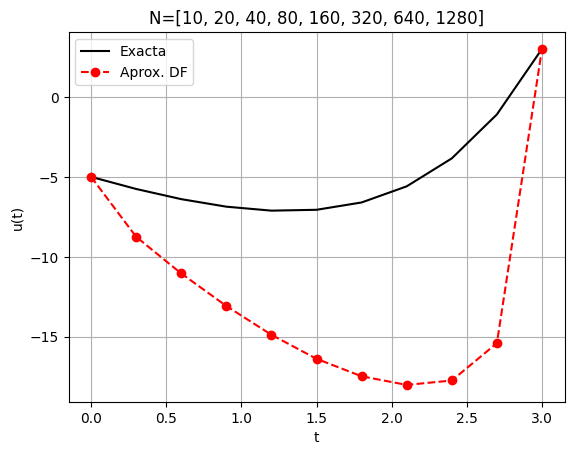

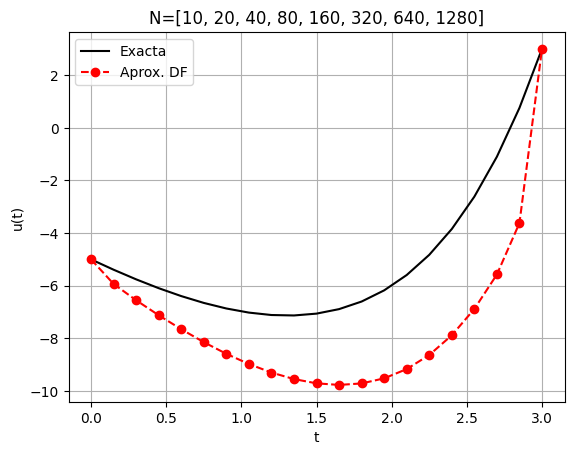

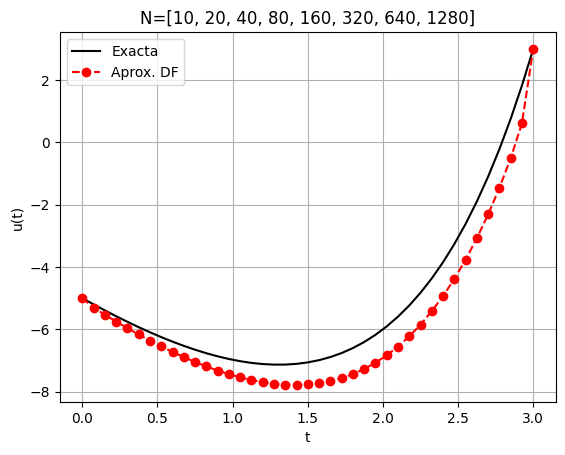

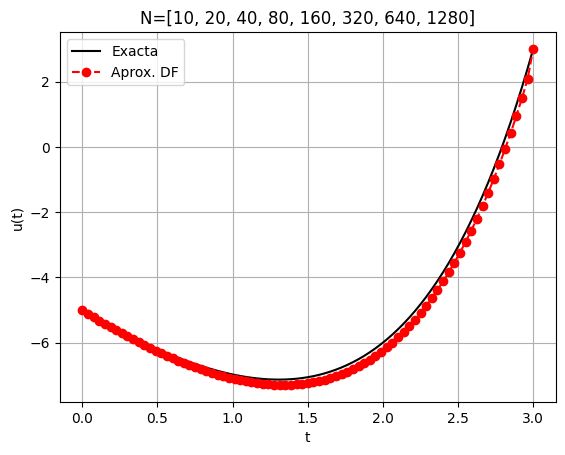

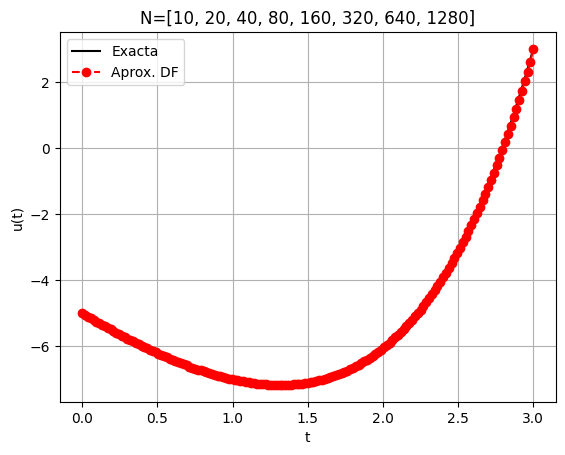

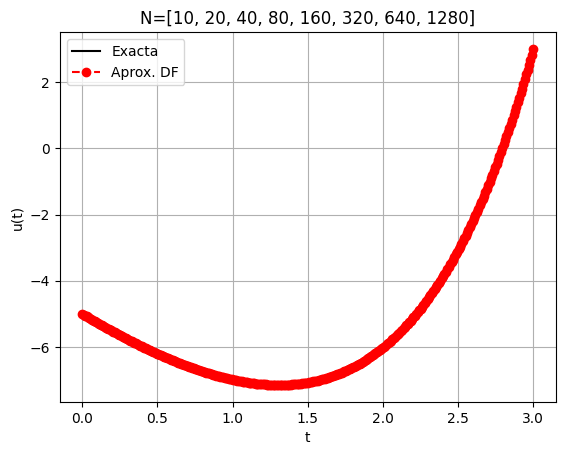

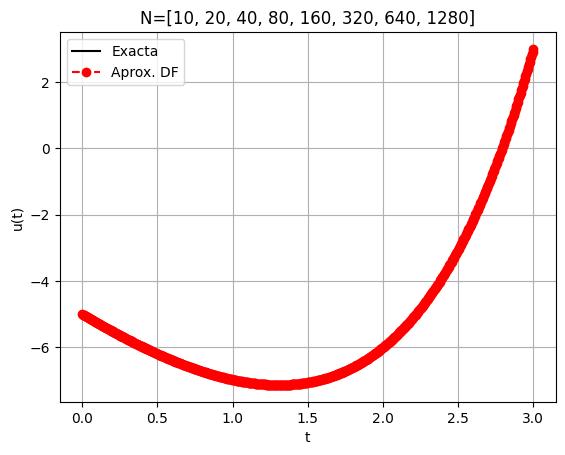

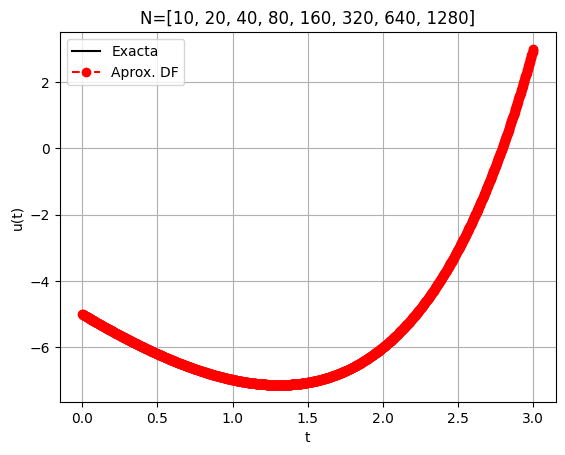

In [20]:
# Implementación 6.b.2

def finite_diff_solution_6_b_2(N, a, b):
    h = (b-a) / N
    t = np.linspace(a, b, N + 1)

    n_unknowns = N - 1
    U = np.zeros(n_unknowns)

    A = np.zeros((n_unknowns, n_unknowns))
    f = np.full(n_unknowns, 12*(h**2))

    for i in range(n_unknowns):
      f[i] *= np.exp(t[i+1])   # i+1 en vez de i


    f[0] += 5
    f[1] += -5
    f[-2] += 3
    f[-1] += -3

    if n_unknowns > 1:
      A[0, 0] = -2
      A[0, 1] = 1

      A[1, 0] = 16
      A[1, 1] = -30
      A[1, 2] = 16
      A[1, 3] = -1

      A[-2, -1] = 16
      A[-2, -2] = -30
      A[-2, -3] = 16
      A[-2, -4] = -1

      A[-1, -1] = -2
      A[-1, -2] = 1

    for i in range(2, n_unknowns - 2):
      A[i, i - 2] = -1
      A[i, i - 1] = 16
      A[i, i] = -30
      A[i, i + 1] = 16
      A[i, i + 2] = -1

    U = np.linalg.solve(A, f)

    u_approx = np.concatenate(([-5.0], U, [3.0]))

    return t, u_approx, A


def exact_solution_6(t):
    return ((9-np.exp(3))/3)*t -6 + np.exp(t)

# Parámetros
N = [10,20,40,80,160,320,640,1280]
for n in N:
  t, u_approx,_ = finite_diff_solution_6_b_2(n,0,3)
  u_exact = exact_solution_6(t)
  plt.figure()
  plt.plot(t, u_exact, "k-", label="Exacta")
  plt.plot(t, u_approx, "ro--", label="Aprox. DF")
  plt.title(f"N={N}")
  plt.xlabel("t")
  plt.ylabel("u(t)")
  plt.legend()
  plt.grid(True)
  plt.show()

In [21]:
#Tablas

# Lista de tamaños de paso a probar

N = [10,20,40,80,160,320,640,1280]

hs = [1/(n+1) for n in N]

DOF_list = []
h_list = []
err_inf_list = []
err_2_list = []
err_1_list = []
rate_inf_list = [None]  # El primer valor no tiene tasa
rate_2_list = [None]
rate_1_list = [None]

cond_inf_list = []
cond_2_list = []
cond_1_list = []
rate_cond_inf_list = [None]
rate_cond_2_list = [None]
rate_cond_1_list = [None]

prev_err_inf = prev_err_2 = prev_err_1 = None
prev_cond_inf = prev_cond_2 = prev_cond_1 = None
prev_h = None


for (h,n) in zip(hs,N):
    x, U, A = finite_diff_solution_6_b_2(n,0,3)
    U_exact = exact_solution_6(x)
    error = np.abs(U - U_exact)
    err_inf = np.linalg.norm(error, np.inf)
    err_2 = np.linalg.norm(error, 2)
    err_1 = np.linalg.norm(error, 1)

    DOF = len(U)
    # Calcular el número de condición de la matriz A en distintas normas
    cond_inf = np.linalg.cond(A, np.inf)
    cond_2 = np.linalg.cond(A, 2)
    cond_1 = np.linalg.cond(A, 1)

    DOF_list.append(DOF)
    h_list.append(h)
    err_inf_list.append(err_inf)
    err_2_list.append(err_2)
    err_1_list.append(err_1)
    cond_inf_list.append(cond_inf)
    cond_2_list.append(cond_2)
    cond_1_list.append(cond_1)

    if prev_h is not None:
        rate_inf = np.log(err_inf / prev_err_inf) / np.log(h / prev_h)
        rate_2 = np.log(err_2 / prev_err_2) / np.log(h / prev_h)
        rate_1 = np.log(err_1 / prev_err_1) / np.log(h / prev_h)
        rate_cond_inf = np.log(cond_inf / prev_cond_inf) / np.log(h / prev_h)
        rate_cond_2 = np.log(cond_2 / prev_cond_2) / np.log(h / prev_h)
        rate_cond_1 = np.log(cond_1 / prev_cond_1) / np.log(h / prev_h)
    else:
        rate_inf = rate_2 = rate_1 = None
        rate_cond_inf = rate_cond_2 = rate_cond_1 = None

    rate_inf_list.append(rate_inf)
    rate_2_list.append(rate_2)
    rate_1_list.append(rate_1)
    rate_cond_inf_list.append(rate_cond_inf)
    rate_cond_2_list.append(rate_cond_2)
    rate_cond_1_list.append(rate_cond_1)

    prev_err_inf, prev_err_2, prev_err_1 = err_inf, err_2, err_1
    prev_cond_inf, prev_cond_2, prev_cond_1 = cond_inf, cond_2, cond_1
    prev_h = h

    err_max = np.max(np.abs(U - U_exact))

    tabla_errores = pd.DataFrame(
        {
            "DOF": DOF_list,
            "h": h_list,
            "||u_h - φ_h||∞": err_inf_list,
            "r∞(u)": rate_inf_list[1:],
            "||u_h - φ_h||₂": err_2_list,
            "r₂(u)": rate_2_list[1:],
            "||u_h - φ_h||₁": err_1_list,
            "r₁(u)": rate_1_list[1:],
        }
    )
    tabla_condicion = pd.DataFrame(
    {
        "DOF": DOF_list,
        "h": h_list,
        "cond∞(A_h)": cond_inf_list,
        "r∞": rate_cond_inf_list[1:],
        "cond₂(A_h)": cond_2_list,
        "r₂": rate_cond_2_list[1:],
        "cond₁(A_h)": cond_1_list,
        "r₁": rate_cond_1_list[1:],
    }
)

In [22]:
tabla_errores

,DOF,h,||u_h - φ_h||∞,r∞(u),||u_h - φ_h||₂,r₂(u),||u_h - φ_h||₁,r₁(u)
0,11,0.090909,14.306080,NaN,29.771595,NaN,82.424856,NaN
1,21,0.047619,4.476651,1.796722,12.666117,1.321665,49.932028,0.775137
2,41,0.024390,1.268265,1.885099,4.917774,1.414057,27.494958,0.891802
3,81,0.012346,0.337338,1.945023,1.822386,1.457986,14.428139,0.947047
4,161,0.006211,0.086976,1.973134,0.659660,1.479248,7.390611,0.973819
5,321,0.003115,0.022122,1.984061,0.235989,1.489690,3.740259,0.986984
6,641,0.001560,0.005581,1.991253,0.083928,1.494861,1.881471,0.993511
7,1281,0.000781,0.001402,1.995643,0.029760,1.497435,0.943584,0.996760


In [23]:
tabla_condicion

,DOF,h,cond∞(A_h),r∞,cond₂(A_h),r₂,cond₁(A_h),r₁
0,11,0.090909,1.347598e+02,NaN,155.900872,NaN,3.285310e+02,NaN
1,21,0.047619,3.347601e+02,-1.407179,304.519246,-1.035394,6.999498e+02,-1.169727
2,41,0.024390,1.134760e+03,-1.824622,913.571188,-1.642071,1.442787e+03,-1.081121
3,81,0.012346,4.334760e+03,-1.968410,3482.347004,-1.965260,4.266222e+03,-1.592287
4,161,0.006211,1.713476e+04,-2.000775,13844.860765,-2.009167,1.706622e+04,-2.018141
5,321,0.003115,6.833476e+04,-2.004689,55339.614911,-2.007973,6.826622e+04,-2.009044
6,641,0.001560,2.731348e+05,-2.003427,221341.039467,-2.004394,2.730662e+05,-2.004515
7,1281,0.000781,1.092335e+06,-2.001984,885357.947049,-2.002244,1.092266e+06,-2.002256
